- **Nombre del candidato:** Juan Carlos Salazar Mesa
- **Fecha:** 08/08/2025
- **Email de contacto:** jucasamesa2@gmail.com

# Introducción

El equipo de Moderaciones IT (ModIT) dentro de Mercado Libre, se encarga de bloquear productos del marketplace que infringen políticas como derechos de autor, derechos de marca o aquellos cuyas imágenes no cumplen ciertos estándares de calidad. Estas bajas o moderaciones se pueden realizar manualmente o de forma automática, esta última siempre apoyada por modelos de Machine Learning que toman decisiones con base en los atributos (precio, marca, título, descripción, etc) y/o las imágenes de los productos.

Debido a que Mercado Libre tiene como prioridad en el 2022 el segmento de moda, ModIT está analizando todos los productos nuevos dentro del segmento de moda con el fin de moderar aquellos cuya imagen de portada no presente el producto en un fondo plano en color blanco o crema. Teniendo en cuenta que este trabajo está siendo realizado de forma manual por un equipo de 10 personas (moderadores) el análisis de ítems se limita a un total de 4,000 diarios. 

Ante esto nuestro equipo decide aceptar el reto y disparar un proceso de experimentación para identificar si podríamos o no generar algún recurso que apoye al equipo ModIT para automatizar el proceso y agregar valor a la experiencia laboral de los moderadores. 

A continuación te presentaremos 3 tareas comunes que nos enfrentamos como equipo al momento proponer una solución a algún problema planteado, para resolver cada una de ellas ten en cuenta los siguientes puntos:

1. Siéntete libre de realizar preguntas ante cualquier duda que se te presente. Estamos a un correo de distancia.
2. Los experimentos que realices deben ser replicables. Asegúrate de dejar disponible todo lo necesario para que podamos ejecutar tu código. Puedes usar archivos auxiliares como archivo de dependencias o scripts con funciones o clases.
3. Es importante que documentes lo que más puedas de tu código y dejes plasmado todas las ideas, procesos, experimentos, hipótesis y/o conclusiones que tuviste mientras estabas resolviendo el problema.
4. No esperamos una solución perfecta, para nosotros es más importante el proceso que planteas que el performance de la solución.

Mucha suerte!

# Parte I

Para el proceso de experimentación ModIT nos envía un archivo CSV (`training_data.csv`) con las siguientes columnas:
- **item_id:** Identificador único de item dentro del marketplace.
- **site_id:** País al que pertenece el ítem.
- **domain_id:** Categoría del marketplace a la que pertenece el ítem.
- **picture_id:** Identificador único de la imagen de portada del ítem. Con el *picture_id* podrás construir una url para descargar cada imagen, la estructura es la siguiente: https://http2.mlstatic.com/D_{picture_id}-F.jpg, e.g. http://http2.mlstatic.com/D_680853-MLM50014173158_052022-F.jpg
- **correct_background?:** 1 si el producto se presenta en un fondo apropiado, 0 de lo contrario.

En esta sección se requiere que realices los experimentos necesarios que permitan responder sí podemos o no dar solución al problema. 

## 1. Estado del arte

Antes de realizar la experimentación y determinar si podemos o no ayudar a ModIT. Se realizó una revisión del estado del arte sobre las: 

**Investigaciones sobre Detección Automática de Fondos en Imágenes de Productos para E-commerce**

Las 5 investigaciones más relevantes sobre políticas de calidad para detección de fondos en imágenes de productos han revolucionado la moderación automatizada en plataformas de comercio electrónico. Los avances recientes demuestran que la combinación de modelos fundamentales generalistas con soluciones especializadas comerciales puede lograr precisiones superiores al 90% en la detección y validación de fondos, reduciendo hasta un 70% el tiempo de moderación manual en marketplaces de gran escala.

1. [Caso de Estudio MercadoLibre con Vue.ai (2021)](https://www.vue.ai/blog/ai-in-retail/automated-image-quality-moderation/)
[Autores: Vue.ai Research Team en colaboración con MercadoLibre](https://www.vue.ai/resources/case-studies/automated-image-moderation-for-mercadolibre/)
Año: 2021
Metodología: Implementación de solución de moderación automatizada de imágenes utilizando clasificadores de Redes Neuronales Convolucionales (CNN) con puntuación de confianza (escala 0-1) para decisiones automáticas de aceptación/rechazo. Sistema capaz de procesar 30k solicitudes por minuto.
Logros: 70% de reducción en tasas de rollback durante tres meses, 45% de reducción promedio mensual en tasas de rollback, 30% de reducción en tickets de contacto con proveedores, y 51% de reducción total en contactos durante tres meses.
Disponibilidad de implementación: Sistema de producción implementado en el ecosistema de e-commerce más grande de América Latina (275.4 millones de listados activos). Incluye capacidades de retroalimentación en tiempo real y reentrenamiento continuo de modelos.

2. [Sesgo de Fondo en Aprendizaje Métrico Profundo (2022)](arXiv:2210.01615v1)
Autores: Konstantin Kobs, et al.
Año: 2022
Metodología: Análisis del impacto del fondo en modelos de aprendizaje métrico profundo para recuperación de productos, con integración automática de eliminación de fondos. Estudia el sesgo de fondo en sistemas de recuperación de productos y propone soluciones mediante reemplazo automático de fondos.
Hallazgos clave: Identificación de sesgo significativo de fondo en sistemas de recuperación de productos. Demuestra que el **reemplazo de fondos durante el entrenamiento mejora el rendimiento**. La eliminación automática de fondos reduce el sesgo sin anotación manual adicional.
Disponibilidad de implementación: Utiliza métodos de eliminación automática de fondos para aumentación de datos de entrenamiento. Código y metodología específicos para aplicaciones de recuperación de productos y e-commerce.

3. [Segment Anything Model (SAM) - Meta AI (2023)](https://github.com/facebookresearch/segment-anything) 
Autores: Alexander Kirillov, Eric Mintun, Nikhila Ravi, et al. (Meta AI)
Año: 2023
Metodología: Modelo fundamental para segmentación de imágenes basado en arquitectura Vision Transformer (ViT) con capacidades de segmentación mediante prompts. Incluye tres componentes principales: codificador de imagen, codificador de prompts y decodificador de máscaras.
Logros: El modelo fue entrenado con 1 billón de máscaras en 11 millones de imágenes, logrando rendimiento competitivo con métodos supervisados en escenarios de zero-shot. Su capacidad de generalización permite aplicaciones directas en imágenes de productos sin reentrenamiento específico.
Disponibilidad de implementación: Código completamente abierto disponible en GitHub con múltiples implementaciones específicas para e-commerce. Incluye APIs comerciales y integraciones para plataformas de marketplace.

4. [Impacto de la Eliminación de Fondos en Redes Neuronales para Clasificación de Imágenes de Moda (2023)](https://arxiv.org/abs/2308.09764)
Autores: Junhui Liang, Vladimir Vlassov, et al.
Año: 2023 (actualizado mayo 2024)
Metodología: Evaluación exhaustiva de técnicas de Detección de Objetos Prominentes (SOD) para eliminación de fondos en moda. Utiliza U2Net y otras redes SOD con análisis específico para imágenes de productos textiles con fondos diversos.
Hallazgos clave: Mejora de hasta 5% en precisión en el dataset FashionStyle14 para redes neuronales superficiales. Demuestra que la eliminación de fondos es efectiva para redes simples pero presenta incompatibilidades con técnicas de regularización de aprendizaje profundo. Utilizaron [rembg].(https://github.com/danielgatis/rembg)
Disponibilidad de implementación: Detalles completos de implementación proporcionados utilizando U2Net. Dataset FashionStyle14 con 2,616 imágenes anotadas disponible para replicación de resultados.

5. [BRIA AI RMBG Models v2.0 (2024)](https://huggingface.co/spaces/briaai/BRIA-RMBG-2.0)
Autores: BRIA AI Research Team
Año: 2024
Metodología: Construido sobre la arquitectura BiRefNet (Bilateral Reference Network) con esquema de entrenamiento propietario. Utiliza 15,000+ imágenes de alta resolución con licencias legales, incluyendo productos comerciales, personas con objetos y demografías equilibradas.
Hallazgos clave: RMBG v2.0 alcanza 90% de precisión en benchmarks comerciales, superando significativamente a Adobe Photoshop (46%) y rivalizando con remove.bg (97%). Procesamiento en tiempo real con capacidades de producción industrial.
Disponibilidad de implementación: Modelos disponibles en Hugging Face con licencias comerciales. Específicamente diseñado para aplicaciones de e-commerce, gaming y publicidad con datos de entrenamiento de calidad profesional.

**Conclusiones técnicas**
La investigación demuestra una madurez técnica significativa en sistemas automatizados de control de calidad y validación de imágenes para marketplaces de e-commerce desde 2022-2025. Los enfoques basados en aprendizaje profundo, particularmente arquitecturas CNN y ResNet, han alcanzado rendimiento listo para producción con mejoras documentadas del 70% en eficiencia de procesamiento y incrementos del 30% en tasas de conversión.
Las implementaciones más exitosas combinan modelos fundamentales generalistas como SAM para flexibilidad investigativa con modelos comerciales especializados como BRIA RMBG para despliegues de producción que requieren alta precisión y cumplimiento legal. Esta estrategia híbrida permite optimizar tanto la investigación académica como las aplicaciones comerciales inmediatas.

Dado qué en el pasado MELI contrato a Vue.ai para la moderación de imágenes y teniendo en cuenta los avances en segmentación de imágenes y remoción de fondos. Se puede concluir que sí es posible ayudar a ModIT a dar solución al problema. 

Para ello lo primero es extraer las imágenes del archivo `data/training_data.csv`, para lo cuál se creo el flujo `image_downloader.py` el cuál descarga las imágenes en un directorio seleccionado, para este caso en `data/images` y crea un resumen en `data/downloaded_images_dataset.csv`.

### Ambiente de programacion

In [63]:
import sys

sys.path.append("../")

import numpy as np
import colour
import pandas as pd
pd.set_option('display.max_columns', 200)

from tqdm import tqdm
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.metrics import f1_score
from analyze_background_colors import explore_color_ranges
from eda_modules.image_analyzer import ImageAnalyzer

## 2. EDA
A continuación una revisión de las imágenes:

In [ ]:
# Cargar dataset de imagenes descargadas
train_csv_path = Path("../data/train_images_dataset.csv")

train = pd.read_csv(train_csv_path)
train.shape

(4372, 11)

In [27]:
train.sample(2)

,item_id,site_id,domain_id,picture_id,correct_background?,image_url,local_path,filename,download_success,error_message,file_exists
612,MLB2619470880,MLB,MLB-T_SHIRTS,619717-CBT49728894105_042022,1,https://http2.mlstatic.com/D_619717-CBT4972889...,data\images\MLB2619470880_619717-CBT4972889410...,MLB2619470880_619717-CBT49728894105_042022.jpg,True,NaN,False
65,MLM1455409106,MLM,MLM-JACKETS_AND_COATS,663470-CBT50637652840_072022,0,https://http2.mlstatic.com/D_663470-CBT5063765...,data\images\MLM1455409106_663470-CBT5063765284...,MLM1455409106_663470-CBT50637652840_072022.jpg,True,NaN,False


In [ ]:
# Revision del tipo de ropa
train['domain_id'].str.split("-").str[1].value_counts()

domain_id
JACKETS_AND_COATS                   827
T_SHIRTS                            821
SNEAKERS                            703
PANTS                               339
SWEATSHIRTS_AND_HOODIES             244
SHIRTS                              200
BOOTS_AND_BOOTIES                   196
LOAFERS_AND_OXFORDS                 195
BLOUSES                             182
SHORTS                              128
HEELS_AND_WEDGES                    123
SWEATERS_AND_CARDIGANS               95
AUTOMOTIVE_SKIRTS                    69
LEGGINGS                             56
SWIMWEAR                             44
SPORT_T_SHIRTS                       36
FOOTBALL_SHOES                       25
SPORT_SHORTS                         19
SPORT_PANTS                          16
UNDERPANTS                           15
PET_JACKETS_AND_COATS                 9
BABY_SWIMWEAR                         6
MOTORCYCLE_PANTS                      6
FISHING_SHIRTS                        6
SPORT_SWIMWEAR                

In [50]:
# Crear la instancia para manejar imagenes proveniente de eda.modules
analyzer = ImageAnalyzer()
# Path inicial a imagenes
project_root = Path("../")
# Crear lista donde se guardaran los df
df_list = []
# Iterar en cada fila y analizar cada imagen
for idx, row in tqdm(train.iterrows()):

    local_df = pd.DataFrame(analyzer.analyze_single_image(project_root / row['local_path']), index=[idx])
    df_list.append(local_df)
    
# Concatenar df de data de imagenes
train_data = pd.concat(df_list)
train_data.shape

4372it [59:29,  1.22it/s]


(4372, 28)

In [60]:
train.head(1)

,item_id,site_id,domain_id,picture_id,correct_background?,image_url,local_path,filename,download_success,error_message,file_exists
0,MLA1133559288,MLA,MLA-PANTS,727367-MLA49747205451_042022,0,https://http2.mlstatic.com/D_727367-MLA4974720...,data\images\MLA1133559288_727367-MLA4974720545...,MLA1133559288_727367-MLA49747205451_042022.jpg,True,NaN,True


In [ ]:
# Guardar propiedades extraidas en los csv
train.merge(train_data.rename(columns={'image_name':'filename'}), how='left', on='filename')\
    .to_csv(train_csv_path, index=False)

In [51]:
# Cargar dataset de imagenes descargadas
val_csv_path = Path("../data/productive_images_dataset.csv")

val = pd.read_csv(val_csv_path)
val.shape

(1627, 11)

In [52]:
# Crear lista donde se guardaran los df
df_list = []
# Iterar en cada fila y analizar cada imagen
for idx, row in tqdm(val.iterrows()):

    local_df = pd.DataFrame(analyzer.analyze_single_image(project_root / row['local_path']), index=[idx])
    df_list.append(local_df)
    
# Concatenar df de data de imagenes
val_data = pd.concat(df_list)
val_data.shape

1627it [21:04,  1.29it/s]


(1627, 28)

In [66]:
val.merge(val_data.rename(columns={'image_name':'filename'}), how='left', on='filename')\
    .to_csv(val_csv_path, index=False)

### Datasets imagenes caracterizadas

In [67]:
# Cargar dataset de imagenes descargadas
train_csv_path = Path("../data/train_images_dataset.csv")

train = pd.read_csv(train_csv_path)
train.shape

(4372, 38)

In [69]:
train.sample(1)

,item_id,site_id,domain_id,picture_id,correct_background?,image_url,local_path,filename,download_success,error_message,file_exists,image_path,width,height,aspect_ratio,total_pixels,brightness,contrast,entropy,sharpness,noise_level,saturation,value,background_ratio,object_ratio,dominant_color_r,dominant_color_g,dominant_color_b,dominant_color_h,dominant_color_s,dominant_color_v,edge_density,contour_count,texture_contrast,texture_dissimilarity,texture_homogeneity,texture_energy,texture_correlation
227,MLM1450069128,MLM,MLM-SHIRTS,681700-MLM50532343981_062022,1,https://http2.mlstatic.com/D_681700-MLM5053234...,data\images\MLM1450069128_681700-MLM5053234398...,MLM1450069128_681700-MLM50532343981_062022.jpg,True,NaN,False,..\data\images\MLM1450069128_681700-MLM5053234...,777,1200,0.6475,932400,193.69075,64.345939,5.17638,362.395588,3.448128,7.643111,195.658505,1.0,0.0,254.403,254.349,254.319,0,0,254,0.0,0,1614.135453,21.634544,0.426258,0.393253,0.804729


<Figure size 1000x700 with 0 Axes>

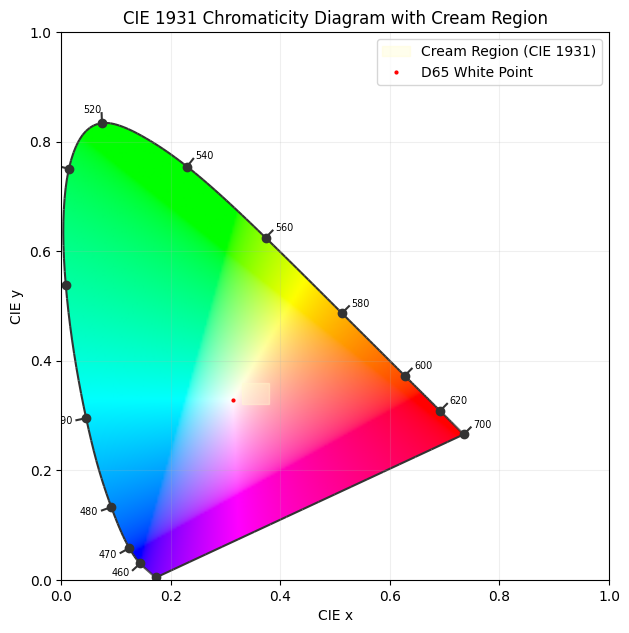

In [58]:
# Define cream thresholds (x, y, Y)
cream_x_min, cream_x_max = 0.33, 0.38
cream_y_min, cream_y_max = 0.32, 0.36

# Create figure
plt.figure(figsize=(10, 7))
colour.plotting.plot_chromaticity_diagram_CIE1931(show=False)

# Draw cream region as a polygon
cream_vertices = np.array([
    [cream_x_min, cream_y_min],
    [cream_x_min, cream_y_max],
    [cream_x_max, cream_y_max],
    [cream_x_max, cream_y_min]
])
plt.fill(
    cream_vertices[:, 0], cream_vertices[:, 1],
    color='#FFFDD0', alpha=0.4, label='Cream Region (CIE 1931)'
)

# Mark the white point (D65) for reference
plt.plot(0.3127, 0.3290, 'ro', markersize=2, label='D65 White Point')

# Add labels and legend
plt.title('CIE 1931 Chromaticity Diagram with Cream Region')
plt.legend(loc='upper right')
plt.grid(alpha=0.2)
plt.show()

### Adicionar las etiquetas los datasets procesados

In [34]:
train_csv_path = Path("../data/train_processed/background_masks_data_with_labels.csv")

train = pd.read_csv(train_csv_path)
train.shape

(3669, 16)

In [35]:
train.sample(2)

,original_image_name,processed_image_name,mask_height,mask_width,mask_mean,mask_std,mask_min,mask_max,background_pixels,total_pixels,avg_background_r,avg_background_g,avg_background_b,is_white_background,is_cream_background,correct_background?
1423,MLB2647501945_884430-MLB50000341366_052022.jpg,background_extracted_MLB2647501945_884430-MLB5...,800,451,103.044013,123.908812,0,255,145146,360800,229.114561,227.721921,226.485621,False,False,0
3347,MLB2666851784_691366-MLB50192768695_062022.jpg,background_extracted_MLB2666851784_691366-MLB5...,1200,839,84.782016,118.464079,0,255,332159,1006800,254.865191,254.838628,254.814077,True,True,1


In [36]:
train[['is_white_background','is_cream_background']].value_counts()

is_white_background  is_cream_background
False                False                  2059
True                 False                   815
                     True                    762
False                True                     33
Name: count, dtype: int64

In [40]:
train['predicted_background'] = (train['is_white_background']|train['is_cream_background']).map({True:1,False:0})

In [41]:
train[['correct_background?','predicted_background']].value_counts()

correct_background?  predicted_background
0                    0                       1804
1                    1                       1579
                     0                        255
0                    1                         31
Name: count, dtype: int64

In [42]:
f1_score(train['correct_background?'], train['predicted_background'], average='micro')

0.9220496047969474

In [43]:
stats = explore_color_ranges(train)


🔬 Color Range Exploration:
Red channel statistics:
  Mean: 203.0, Std: 58.7
  Min: 1.0, Max: 255.0
  75th percentile: 254.4, 90th percentile: 254.7

Green channel statistics:
  Mean: 196.4, Std: 64.2
  Min: 0.7, Max: 255.0
  75th percentile: 254.4, 90th percentile: 254.7

Blue channel statistics:
  Mean: 191.0, Std: 69.2
  Min: 0.8, Max: 255.0
  75th percentile: 254.2, 90th percentile: 254.7

📊 Potentially light backgrounds (RGB > 200): 1935 (52.7%)

Top 10 lightest backgrounds:
  MLM1403067937_733341-MLM49613568962_042022.jpg: RGB(255, 255, 255)
  MLB2630458014_643810-MLB49839261285_052022.jpg: RGB(255, 255, 255)
  MLB2700174654_742825-MLB50532939351_062022.jpg: RGB(255, 255, 255)
  MLM1399088655_654983-MLM49526282274_032022.jpg: RGB(255, 255, 255)
  MLB2681170697_939953-MLB50331809478_062022.jpg: RGB(255, 255, 255)
  MLB2174260722_706269-CBT49082169652_022022.jpg: RGB(255, 255, 255)
  MLB2638795388_801230-MLB49920641672_052022.jpg: RGB(255, 255, 255)
  MLM1445535781_978602-MLM497545

## 3. Modeling

In [47]:
# Define paths for preprocessed and filtered data
masks_train_path = Path("../data/train_processed/background_masks_arrays_filtered.npz")
mapping_train_path = Path("../data/train_processed/mask_arrays_mapping_filtered.csv")
labels_train_path = Path("../data/train_processed/background_masks_data_with_labels.csv")

masks_val_path = Path("../data/val_processed/background_masks_arrays_filtered.npz")
mapping_val_path = Path("../data/val_processed/mask_arrays_mapping_filtered.csv")
labels_val_path = Path("../data/val_processed/background_masks_data_with_labels.csv")

In [53]:
def load_and_prepare_data(masks_path, mapping_path, labels_path):
    """
    Load the mask arrays and prepare them for training.
    
    Args:
        masks_path (str or Path): Path to the .npz file containing mask arrays (filtered)
        mapping_path (str or Path): Path to the CSV mapping file (filtered)
        labels_path (str or Path): Path to the CSV file with labels (preprocessed with _with_labels.csv)
        
    Returns:
        tuple: (X, y) where X is the feature matrix and y is the target vector
    """
    print("🔍 Loading data...")
    
    # Load the compressed numpy arrays (filtered)
    masks_data = np.load(masks_path)
    print(f"✅ Loaded {len(masks_data.files)} mask arrays (filtered)")
    
    # Load the mapping (filtered)
    mapping_df = pd.read_csv(mapping_path)
    print(f"✅ Loaded mapping with {len(mapping_df)} entries (filtered)")
    
    # Load the preprocessed labels (already filtered and merged)
    labels_df = pd.read_csv(labels_path)
    print(f"✅ Loaded preprocessed labels with {len(labels_df)} entries")
    
    # Check if the required columns exist
    required_columns = ['original_image_name', 'correct_background?']
    missing_columns = [col for col in required_columns if col not in labels_df.columns]
    if missing_columns:
        raise ValueError(f"Missing required columns in labels file: {missing_columns}")
    
    # Prepare data
    X_list = []
    y_list = []
    
    print("🔄 Processing mask arrays...")
    
    # Track the first flattened mask length to ensure consistency
    first_flattened_length = None
    processed_count = 0
    skipped_count = 0
    
    for idx, row in mapping_df.iterrows():
        image_name = row['original_image_name']
        array_key = row['numpy_array_key']
        
        # Check if we have the mask array
        if array_key not in masks_data:
            print(f"⚠️  Warning: Array key {array_key} not found in mask data")
            skipped_count += 1
            continue
            
        # Get the mask array and flatten it using the correct method
        mask_array = masks_data[array_key]
        flattened_mask = mask_array.flatten()  # Use the correct ndarray.flatten() method
        
        # Check if this is the first mask array
        if first_flattened_length is None:
            first_flattened_length = len(flattened_mask)
            print(f"✅ First mask array length: {first_flattened_length}")
        else:
            # Check if the flattened mask has the same length as the first one
            if len(flattened_mask) != first_flattened_length:
                print(f"⚠️  Warning: Inconsistent mask length for {array_key}")
                print(f"   Expected: {first_flattened_length}, Got: {len(flattened_mask)}")
                print(f"   Original shape: {mask_array.shape}")
                skipped_count += 1
                continue
        
        # Check if we have a label for this image in the preprocessed data
        label_row = labels_df[labels_df['original_image_name'] == image_name]
        if label_row.empty:
            print(f"⚠️  Warning: No label found for {image_name} in preprocessed data")
            skipped_count += 1
            continue
            
        # Get the label (should already be cleaned in preprocessed data)
        label = label_row.iloc[0]['correct_background?']
        
        # Convert label to numeric if needed
        if isinstance(label, str):
            if label == '1':
                label = 1
            elif label == '0':
                label = 0
            else:
                print(f"⚠️  Warning: Unknown label value {label} for {image_name}")
                skipped_count += 1
                continue
        
        X_list.append(flattened_mask)
        y_list.append(label)
        processed_count += 1
    
    print(f"✅ Processed {processed_count} samples, skipped {skipped_count} samples")
    
    if not X_list:
        raise ValueError("No valid data found!")
    
    # Verify all arrays have the same length before converting to numpy array
    lengths = [len(x) for x in X_list]
    unique_lengths = set(lengths)
    
    if len(unique_lengths) > 1:
        raise ValueError(f"Inconsistent mask lengths detected! Found lengths: {sorted(unique_lengths)}")
    
    # Convert to numpy arrays
    X = np.array(X_list)
    y = np.array(y_list)
    
    print(f"✅ Processed {len(X)} samples with {X.shape[1]} features each")
    print(f"✅ Target distribution: {np.bincount(y)}")
    
    return X, y


In [54]:
X, y = load_and_prepare_data(masks_train_path, mapping_train_path, labels_train_path)

🔍 Loading data...
✅ Loaded 3669 mask arrays (filtered)
✅ Loaded mapping with 3669 entries (filtered)
✅ Loaded preprocessed labels with 3669 entries
🔄 Processing mask arrays...
✅ First mask array length: 177390
⚠️  Warning: Inconsistent mask length for MLA1144256047_658892_MLA50462327157_062022_jpg
   Expected: 177390, Got: 762048
   Original shape: (1008, 756)
⚠️  Warning: Inconsistent mask length for MLM1437512310_665395_MLM50276676053_062022_jpg
   Expected: 177390, Got: 480000
   Original shape: (800, 600)
⚠️  Warning: Inconsistent mask length for MLM1450568821_993302_MLM50540804839_072022_jpg
   Expected: 177390, Got: 444080
   Original shape: (520, 854)
⚠️  Warning: Inconsistent mask length for MLM1386179404_856571_MLM49257372551_032022_jpg
   Expected: 177390, Got: 467160
   Original shape: (510, 916)
⚠️  Warning: Inconsistent mask length for MLB2640740833_799973_MLB49938161071_052022_jpg
   Expected: 177390, Got: 640000
   Original shape: (800, 800)
⚠️  Warning: Inconsistent mas

In [3]:
path_csv_train = r"../data/raw/training_data.csv"
image_folder = r"../data/raw/img"

In [4]:
# saving_images_in_local(path_csv_train, image_folder)

In [5]:
# df, df2 = analyze_all_images(path_csv_train, image_folder)

In [6]:
df = pd.read_csv(path_csv_train, dtype=str)
df.shape

(4372, 5)

In [7]:
df['img_path'] = df['picture_id'].apply(lambda x: image_folder+f"/D_{x}-F.jpg")

# Revision de funciones

In [95]:
image_path = df[df['img_path'].str.contains("D_820430-MLA49628611503_042022-F.jpg")]['img_path'].tolist()[0]
#df['img_path'][df['img_path'].sample(1, random_state=180).index[0]]

In [96]:
pil_image = Image.open(image_path)
cv_image = cv.cvtColor(np.array(pil_image), cv.COLOR_RGB2BGR)

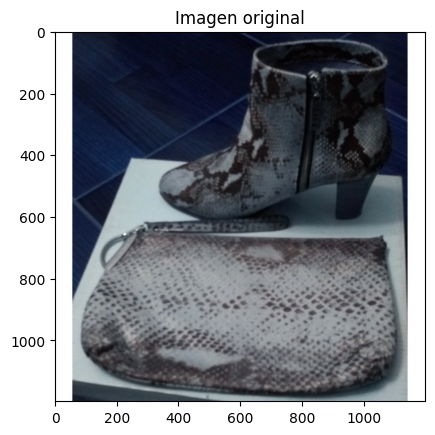

In [97]:
# Load image in BGR format (OpenCV default)
img = cv.imread(image_path)

plt.imshow(img)
plt.title('Imagen original')
plt.show()

In [15]:
array = load_image(image_path)

In [16]:
# Get array dimensions
height, width = array.shape[:2]
total_pixels = height * width

# Analyze different regions of the array (center, corners, edges)
regions = {
    'center': array[height//4:3*height//4, width//4:3*width//4],
    'top_left': array[:height//3, :width//3],
    'top_right': array[:height//3, 2*width//3:],
    'bottom_left': array[2*height//3:, :width//3],
    'bottom_right': array[2*height//3:, 2*width//3:]
    }

In [17]:
array.shape

(269, 536, 3)

In [18]:
height, width, total_pixels

(269, 536, 144184)

In [29]:
regions['center'].shape, regions['top_left'].shape

((252, 122, 3), (167, 81, 3))

In [8]:
df['array'] = df['img_path'].apply(load_image)

In [9]:
df['height'] = df['array'].apply(lambda x: x.shape[0])
df['width'] = df['array'].apply(lambda x: x.shape[1])
df['total_pixels'] = df['height']+df['width']

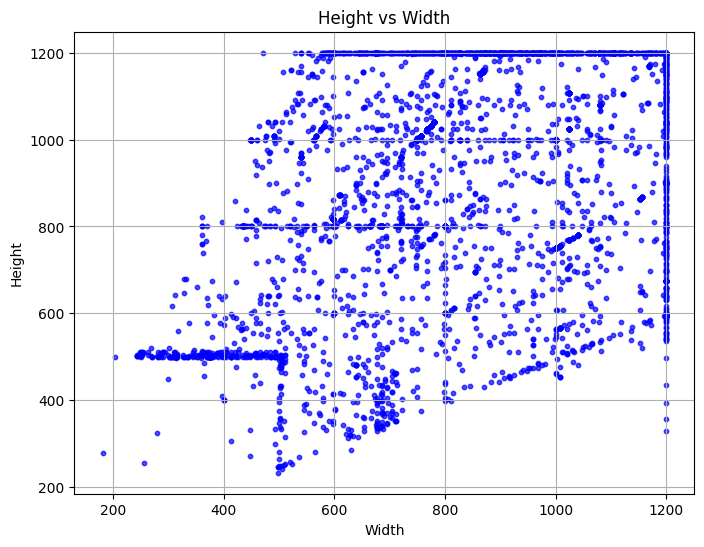

In [35]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['width'], df['height'], color='blue', alpha=0.7, s=10)

# Add labels and title
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Height vs Width')
plt.grid(True)

# Show plot
plt.show()

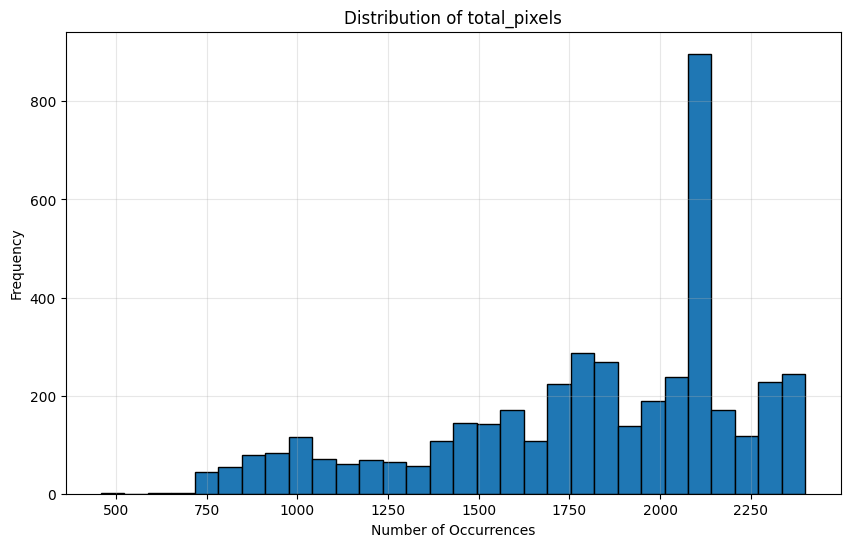

In [40]:
df['total_pixels'].plot(kind='hist', 
                                      bins=30, 
                                      edgecolor='black',
                                      figsize=(10, 6))

# Add labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency')
plt.title('Distribution of total_pixels')
plt.grid(True, alpha=0.3)

plt.show()

In [10]:
df_list = []

for index in range(0, df.shape[0]):

    temp_df = pd.DataFrame(data=extract_corner_stats(df['array'][index], df['height'][index], df['width'][index]), index=[0,])
    df_list.append(temp_df)

df_corners = pd.concat(df_list)

df = pd.concat([df,df_corners.reset_index(drop=True)], axis=1)

In [11]:
df.head(1)

,item_id,site_id,domain_id,picture_id,correct_background?,img_path,array,height,width,total_pixels,top_left,top_right,bottom_left,bottom_right
0,MLA1131600086,MLA,MLA-BOOTS_AND_BOOTIES,820430-MLA49628611503_042022,0,../data/raw/img/D_820430-MLA49628611503_042022...,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",1198,1200,2398,"[148.64, 136.92, 131.8]","[146.01, 135.46, 133.48]","[185.5, 182.53, 176.76]","[202.64, 200.98, 195.53]"


The color ranges I defined for pastel and white detection were determined using a combination of color theory principles and empirical RGB analysis of known pastel colors. Here's the technical breakdown of the methodology:

1. Pastel Color Definition Technique
Pastel colors are characterized by:

High Value (Brightness): Achieved by keeping RGB components above ~180

Low Saturation: Created by having similar values across RGB channels

Soft Appearance: Avoids pure primary colors (no 0 or 255 extremes)

Implementation Approach:

Channel Analysis: For each pastel variant (red, blue, etc.), I:

Identified the dominant channel (e.g., red for pastel red)

Set its range slightly higher than other channels (but below 255)

Constrained secondary channels to be within 30-50 points of the dominant channel

In [12]:
# Color ranges in RGB (0-255 scale)
PASTEL_RANGES = {
    'red': ((220, 240), (180, 220), (180, 220)),
    'blue': ((180, 220), (180, 220), (220, 240)),
    'green': ((180, 220), (220, 240), (180, 220)),
    'yellow': ((240, 255), (240, 255), (180, 220)),
    'pink': ((240, 255), (180, 220), (200, 230)),
    'purple': ((200, 230), (180, 220), (220, 240))
}

WHITE_RANGE = {
    'white':((230, 255), (230, 255), (230, 255))
}

In [18]:
import ast

In [24]:
# Process each corner column
for corner in ['top_left', 'top_right', 'bottom_left', 'bottom_right']:
    df[corner] = df[corner].apply(lambda x: ast.literal_eval(x))  
    col_name = f"{corner}_rgb"
    
    # Create pastel checks
    pastel_results = df[corner].apply(
        lambda x: is_that_color(x, PASTEL_RANGES) if isinstance(x, list) else None
    ).apply(pd.Series)

In [27]:
pastel_results.value_counts()

0    
False    4287
True       85
Name: count, dtype: int64

# Parte II

Con el fin de evaluar la solución, se nos hace llegar un nuevo dataset (`productive_data.csv`) con los últimos 5,800 ítems revisados por el equipo de moderadores. La idea en esta parte es que realices una evaluación de tu propuesta y nos hagas saber si estaría lista para puesta en producción. **Nota:** Recuerda que en Mercado Libre trabajamos codo a codo para alcanzar nuestros objetivos así que cualquier duda o solicitud con gusto será atendida por tus compañeros de equipo o stakeholders.

Lo primero es que al revisar el dataset `productive_data.csv` no se encuentran 5.800 ítems, sino 1.627. Para ello procesamos las imágenes de la misma manera que con el entrenamiento: descarga, resizing y remoción de fondos. Luego aplicamos el modelo para predecir sí cumple las políticas de la compañía.

# Parte III

Debido al gran volumen de ítems que procesamos día a día, algún error en nuestras soluciones podría llegar a afectar muchos vendedores y generar malas experiencias de usuario en el marketplace. Con lo cual, solemos penalizar bastante los errores de clasificación que involucren bajas erróneas de ítems. Como última tarea, te proponemos plantear un proceso que nos permita maximizar la precisión de tu solución con base a los datos que tienes disponibles hasta el momento.